#### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

#### Importing the Dataset

In [2]:
dataset = pd.read_csv('Placement.csv')
dataset.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


#### Checking the columns with normal ditribution to apply Z-score outlier detection

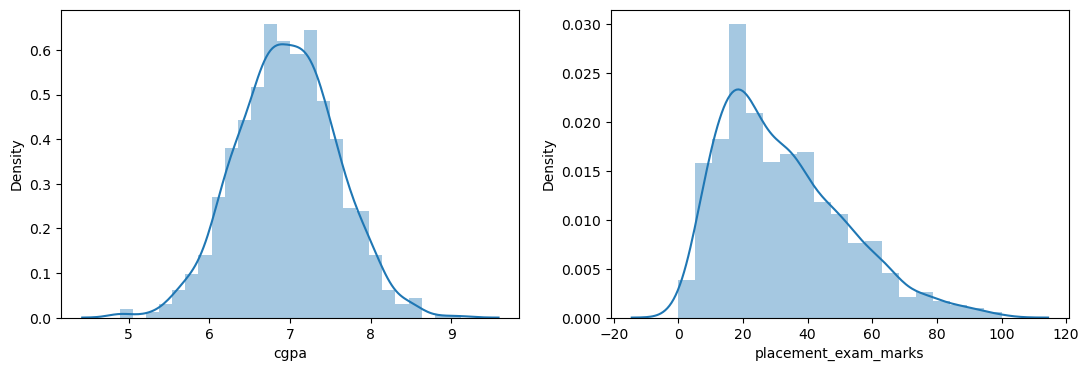

In [3]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
sns.distplot(dataset['cgpa'])

plt.subplot(1,2,2)
sns.distplot(dataset['placement_exam_marks'])

plt.show()

In [4]:
# We can clearly see that cgpa column is normally distributed so Z-score outlier detection can only be applied to cgpa column only.

In [5]:
dataset['cgpa'].skew()

-0.014529938929314918

### Detecting Outliers

In [6]:
print("Mean value of cgpa :",dataset['cgpa'].mean())
print("Std value of cgpa :",dataset['cgpa'].std())
print("Min value of cgpa :",dataset['cgpa'].min())
print("Max value of cgpa :",dataset['cgpa'].max())

Mean value of cgpa : 6.96124000000001
Std value of cgpa : 0.6158978751323894
Min value of cgpa : 4.89
Max value of cgpa : 9.12


In [7]:
# Finding the boundary values
print("Highest allowed", dataset['cgpa'].mean() + 3*dataset['cgpa'].std())
print("Lowest allowed", dataset['cgpa'].mean() - 3*dataset['cgpa'].std())

Highest allowed 8.808933625397177
Lowest allowed 5.113546374602842


In [8]:
# Finding the outliers
dataset[(dataset['cgpa'] > 8.80) | (dataset['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### Removing Outliers

#### 1. Trimming

In [9]:
# Approach 1
new_dataset1 = dataset[(dataset['cgpa'] < 8.80) & (dataset['cgpa'] > 5.11)]
new_dataset1.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [10]:
# Approach 2
# Calculating the Zscore
dataset['cgpa_zscore'] = (dataset['cgpa'] - dataset['cgpa'].mean()) / dataset['cgpa'].std()
dataset['cgpa_zscore']

0      0.371425
1      0.809810
2      0.939701
3     -0.878782
4      0.436371
         ...   
995    3.099150
996    3.505062
997   -3.362960
998    2.693239
999   -3.346724
Name: cgpa_zscore, Length: 1000, dtype: float64

In [11]:
dataset.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [12]:
dataset[(dataset['cgpa_zscore'] > 3) | (dataset['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [13]:
new_datset2 = dataset[(dataset['cgpa_zscore'] < 3) & (dataset['cgpa_zscore'] > -3)]
new_datset2

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


#### 2. Capping

In [14]:
upper_limit = dataset['cgpa'].mean() + 3*dataset['cgpa'].std()
lower_limit = dataset['cgpa'].mean() - 3*dataset['cgpa'].std()

In [15]:
print("Upper Limit :", upper_limit)
print("Lower Limit :", lower_limit)

Upper Limit : 8.808933625397177
Lower Limit : 5.113546374602842


In [16]:
def limit(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

In [17]:
dataset['cgpa'] = dataset['cgpa'].apply(limit)

In [18]:
new_dataset3 = dataset[(dataset['cgpa'] > 8.80) & (dataset['cgpa'] < 5.11)]
new_dataset3
# As we can see there is no value in our age column now that is an outlier anymore so by capping we can replace the outliers and also not loose data

,cgpa,placement_exam_marks,placed,cgpa_zscore


In [20]:
new_dataset3.shape

(0, 4)